In [43]:
import dataclasses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import WLS
from statsmodels.tools.tools import add_constant

In [3]:
@dataclasses.dataclass
class Data:
    train: pd.DataFrame
    test: pd.DataFrame

In [4]:
FILES = ('discounts_train.parq.gzip', 'discounts_test.parq.gzip')

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [5]:
data = Data(
    train=pd.read_parquet(FILES[0]),
    test=pd.read_parquet(FILES[1])
)

In [6]:
data.train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,PB,6,6,1176.485681


In [21]:
avg_sales_per_state = data.train.groupby('cust_state')['sales'].mean().to_dict()

In [22]:
data.train.replace({'cust_state': avg_sales_per_state}, inplace=True)
data.train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,125.0,40.06,40,1.0,2579.424297,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,75.0,29.52,36,0.0,2553.222774,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,50.0,48.08,34,0.0,2518.635848,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,10.0,61.64,31,0.0,2446.648394,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,100.0,34.44,32,1.0,2562.461439,6,6,1176.485681


In [7]:
discount_resids = pd.read_parquet('debias_resid.parq.gzip')
profit_resids = pd.read_parquet('denoise_resid.parq.gzip')

In [9]:
weights = discount_resids ** 2

In [14]:
y = profit_resids.values/discount_resids.values

In [25]:
fit_1 = WLS(endog=y, exog=add_constant(data.train.iloc[:, :-2]).fillna(0), weights=weights).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            WLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     9.753
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.51e-62
Time:                        14:23:57   Log-Likelihood:                -27439.
No. Observations:               15000   AIC:                         5.497e+04
Df Residuals:                   14956   BIC:                         5.530e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5578      0.281      1.988      0.047       0.008       1.108
spend_1m_baby         -0.0068      0.005     -1.328      0.184      -0.017       0.003
spend_2m_baby         -0.0039      0.003     -1.166      0.244      -0.011       0.003
spend_3m_baby         -0.0010      0.003     -0.312      0.755      -0.007       0.005
spend_4m_baby         -0.0016      0.003     -0.651      0.515      -0.007       0.003
spend_5m_baby          0.0043      0.003      1.388      0.165      -0.002       0.010
spend_6m_baby         -0.0002   7.02e-05     -3.164      0.002      -0.000   -8.45e-05
spend_1m_clothes      -0.0012      0.001     -1.928      0.054      -0.002       2e-05
spend_2m_clothes       0.0003      0.000      2.099      0.036    2.18e-05       0.001
spend_3m_clothes   -5.635e-05      0.000     -0.328      0.743      -0.000       0.000
spend_4m_clothes   -5.756e-05      0.000     -0.320      0.749      -0.000       0.000
spend_5m_clothes       0.0004      0.000      2.926      0.003       0.000       0.001
spend_6m_clothes      -0.0003      0.000     -1.510      0.131      -0.001    7.56e-05
spend_1m_health       -0.0048      0.002     -2.698      0.007      -0.008      -0.001
spend_2m_health       -0.0016      0.001     -1.352      0.176      -0.004       0.001
spend_3m_health        0.0015      0.001      2.174      0.030       0.000       0.003
spend_4m_health        0.0005      0.001      0.597      0.550      -0.001       0.002
spend_5m_health        0.0053      0.001      6.262      0.000       0.004       0.007
spend_6m_health        0.0009      0.001      0.611      0.541      -0.002       0.004
spend_1m_pet           0.0029      0.007      0.423      0.672      -0.010       0.016
spend_2m_pet           0.0008      0.004      0.201      0.841      -0.007       0.008
spend_3m_pet        6.894e-05      0.003      0.020      0.984      -0.007       0.007
spend_4m_pet           0.0019      0.005      0.399      0.690      -0.007       0.011
spend_5m_pet          -0.0002      0.007     -0.026      0.979      -0.014       0.013
spend_6m_pet          -0.0028      0.004     -0.739      0.460      -0.010       0.005
spend_1m_groceries -6.933e-05      0.000     -0.182      0.856      -0.001       0.001
spend_2m_groceries    -0.0006      0.000     -3.228      0.001      -0.001      -0.000
spend_3m_groceries    -0.0006      0.000     -4.424      0.000      -0.001      -0.000
spend_4m_groceries    -0.0004      0.000     -2.949      0.003      -0.001      -0.000
spend_5m_groceries    -0.0005      0.000     -3.446      0.001      -0.001      -0.000
spend_6m_groceries    -0.0004      0.000     -2.794      0.005      -0.001      -0.000
spend_1m_eletronic    -0.0004      0.000     -1.354      0.176      -0.001       0.000
spend_2m_eletronic    -0.0014      0.0

In [33]:
data.test.replace({'cust_state': avg_sales_per_state}, inplace=True)
data.test.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,2579.424297,23,55.16
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,2553.222774,18,29.92
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,2518.635848,20,56.15
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,2446.648394,20,50.85
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,2562.461439,22,48.33


In [41]:
data.test['ml_preds'] = fit_1.predict(add_constant(data.test[data.train.iloc[:, :-2].columns]))

In [44]:
def elast(data, x, y):
    cov = data[[x, y]].cov()
    return cov.iloc[1, 0] / cov.iloc[0, 0]

In [45]:
def cumulative_elast_curve(data, order_by, treatment_col='discount', ascending=False):
    ordered = data.sort_values(order_by, ascending=ascending)
    percentiles = np.arange(0., 1., .01)
    edges = [data[order_by].quantile(x) for x in percentiles]
    res = [
        elast(ordered.query(f'{order_by} >= {e}'), treatment_col, 'profit')
        for e in edges[::-1]
    ]
    sns.lineplot(x=percentiles, y=res, label=order_by)
    plt.ylabel('Cumulative Treatment Effect')
    plt.xlabel('% of Customers')
    plt.title('Cumulative Elasticity Curve')
    # plt.show()

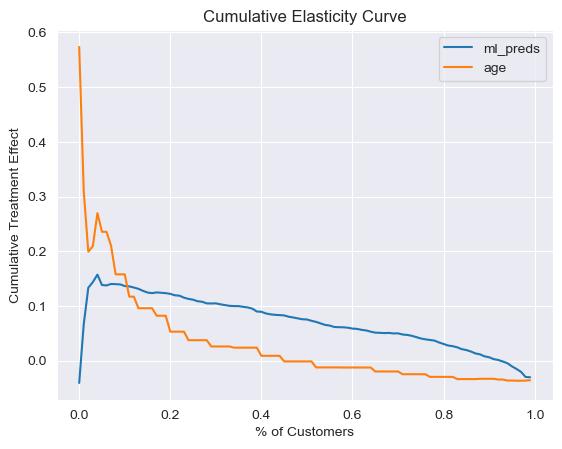

In [46]:
cumulative_elast_curve(data.test, 'ml_preds')
cumulative_elast_curve(data.test, 'age')
plt.show()

In [47]:
def cumulative_gain(data, order_by, treatment_col='discount', ascending=False):
    ordered = data.sort_values(order_by, ascending=ascending)
    percentiles = np.arange(0., 1., .01)
    edges = [data[order_by].quantile(x) for x in percentiles]
    res = [
        elast(ordered.query(f'{order_by} >= {e}'), treatment_col, 'profit') * p
        for e,p in zip(edges[::-1], percentiles)
    ]
    sns.lineplot(x=percentiles, y=res, label=order_by)
    plt.ylabel('Cumulative Gain')
    plt.xlabel('% of Customers')
    plt.title('Cumulative Gain Curve')
    plt.axline((0, 0), (1, elast(data, treatment_col, 'profit')), color='black', linestyle='dotted', alpha=.25)
    # plt.show()

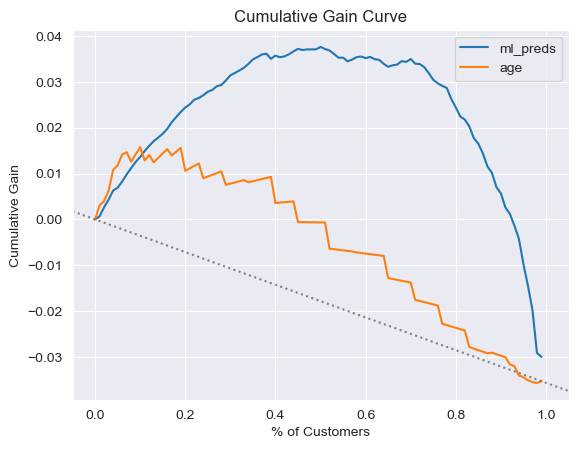

In [48]:
cumulative_gain(data.test, 'ml_preds')
cumulative_gain(data.test, 'age')
plt.show()